In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [10]:
def upperBound(beta, H, order):
    norm = np.linalg.norm(H, ord=1)
    return (beta**(order+1)*norm**(order+1)/ (sp.special.factorial(order+1) * 2**(order))) * np.exp(beta * norm/2)/np.linalg.norm(sp.linalg.expm(-beta*H/2))


[Qibo 0.2.16|WARNING|2025-04-04 09:55:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


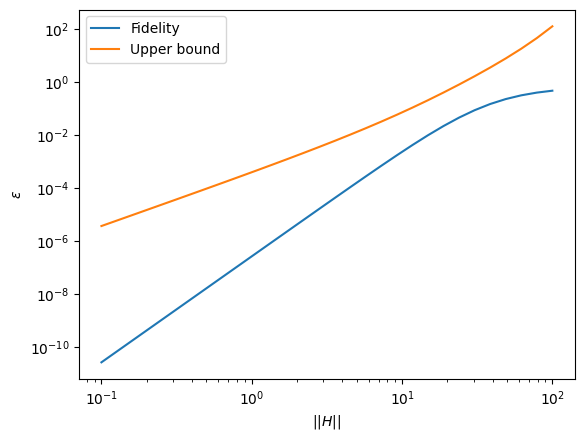

In [11]:
beta = 1
nqubits = 4
norm = np.logspace(-1, 2, 30)
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 1/np.linalg.norm(H)
order = 1
error = np.zeros(len(norm))
bound = np.zeros(len(norm))

for i in range(len(norm)):
    Htest = H * norm[i]
    fidelity = thermalStatePrepMatrixPolynomial(Htest, nqubits, beta, order = order)
    error[i] = 1 - fidelity
    bound[i] = upperBound(beta, Htest, order)

plt.figure()
plt.plot(norm, error, label = 'Fidelity')
plt.plot(norm, bound, label = 'Upper bound')
plt.xlabel(r'$||H||$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

[Qibo 0.2.16|WARNING|2025-04-04 09:55:52]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


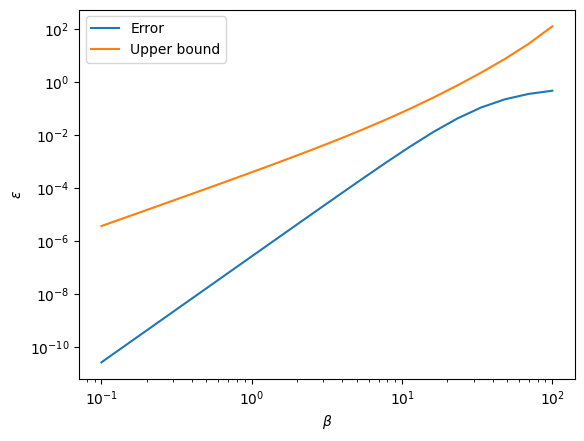

In [ ]:
beta = np.logspace(-1, 2, 20)
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 1/np.linalg.norm(H)
order = 1
error = np.zeros(len(beta))
upperBoundValue = np.zeros(len(beta))

for i in range(len(beta)):
    fidelity = thermalStatePrepMatrixPolynomial(H, nqubits, beta[i], order = order)
    error[i] = 1 - fidelity
    upperBoundValue[i] = upperBound(beta[i], H, order)  

plt.figure()
plt.plot(beta, error, label = 'Error')
plt.plot(beta, upperBoundValue, label = 'Upper bound')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.legend()


[Qibo 0.2.16|WARNING|2025-04-04 10:02:14]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


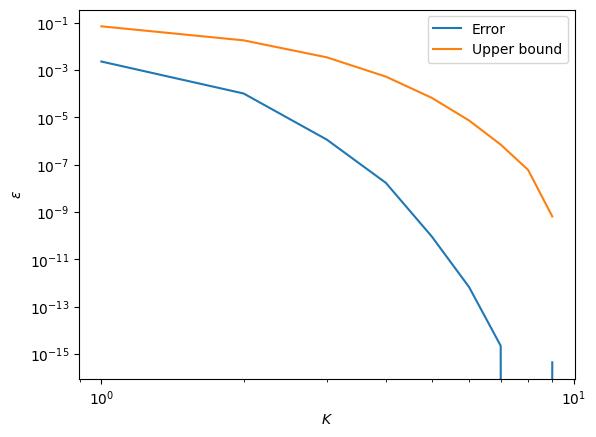

In [22]:
beta = 10
nqubits = 4
H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 1/np.linalg.norm(H)
k = np.arange(1,10,1)
eps = np.zeros(len(k))
upperBoundValue = np.zeros(len(k))

for i in range(len(k)):
    fidelity  = thermalStatePrepMatrixPolynomial(H, nqubits, beta, k[i])
    eps[i] = 1 - fidelity
    upperBoundValue[i] = upperBound(beta, H, k[i])

plt.figure()
plt.plot(k, eps, label = 'Error')
plt.plot(k, upperBoundValue, label = 'Upper bound')
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')


[Qibo 0.2.16|WARNING|2025-04-04 10:02:39]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:02:39]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:02:39]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:02:50]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:02:50]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:02:51]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:03:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:03:05]: Calculating 

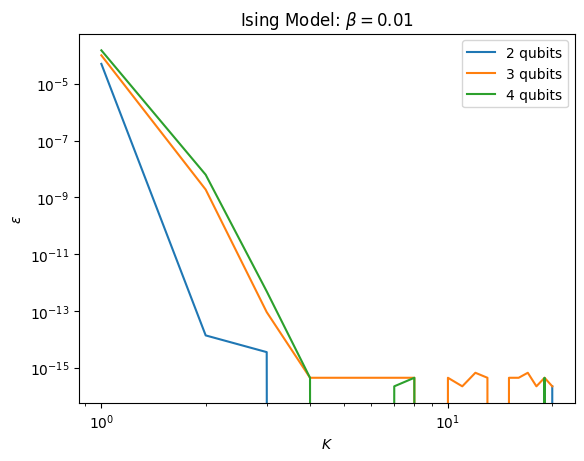

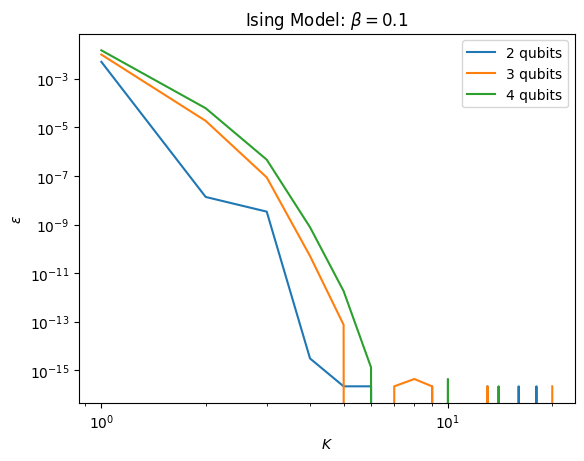

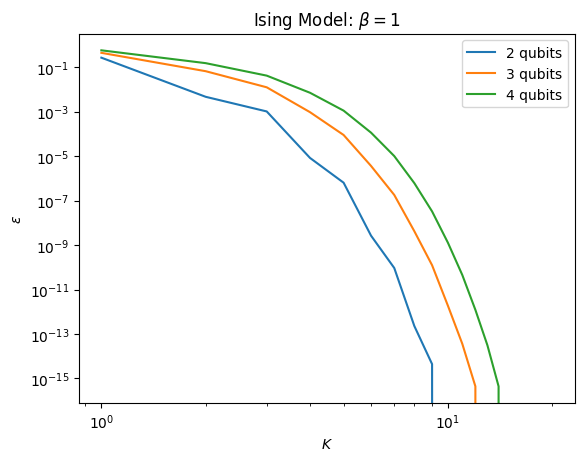

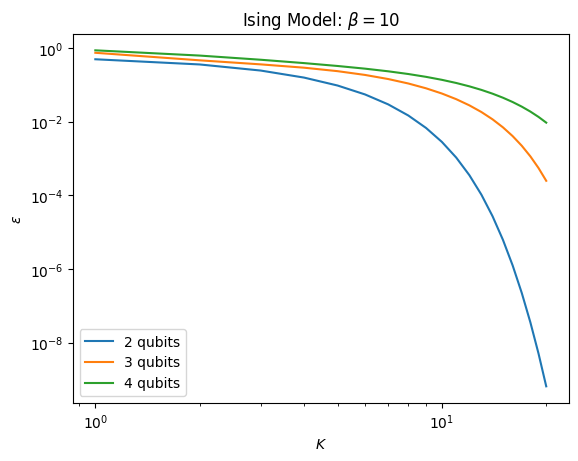

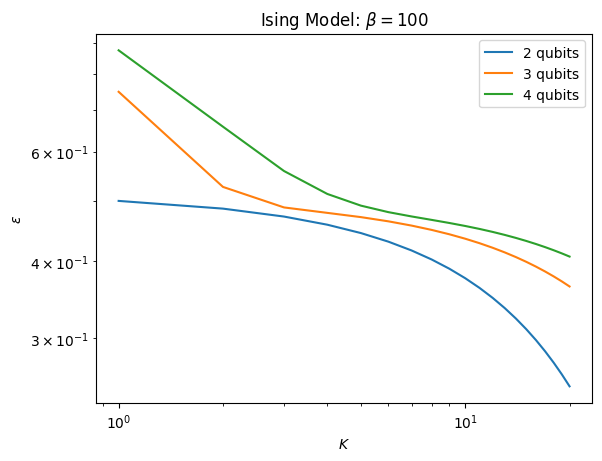

In [24]:
nqubits = [2,3,4]
beta = [0.01 , 0.1 , 1, 10, 100]
for l in range(len(beta)):
    plt.figure()
    plt.title("Ising Model: " + r'$\beta = $' + str(beta[l]))
    for j in range(len(nqubits)):
        H_def = sum([-Z(x)*Z(x+1) + X(x)   for x in range(nqubits[j]-1)])
        H = hamiltonians.SymbolicHamiltonian(H_def).matrix
        H = np.kron(H,np.eye(2**nqubits[j]))
        H = sp.sparse.csr_matrix(H)
        size = 20
        K = np.linspace(1, size, size)
        fidelity = np.empty(size+1)
        initState = tfd0(nqubits[j])
        tfd = TFD(beta[l], H, initState)
        fidelity[0] = Fidelity(tfd, initState)
        for k in range(size):
            initState = tfd0(nqubits[j])
            fidelity[k+1] = thermalStatePrepMatrixPolynomial(H, nqubits[j], beta[l], k)
        plt.plot(K, 1-fidelity[1:], label = f'{nqubits[j]} qubits')
    plt.xscale("log")
    plt.yscale('log')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$\epsilon$')
    plt.legend()


[Qibo 0.2.16|WARNING|2025-04-04 10:04:48]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:04:48]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:04:48]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:05:00]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:05:00]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:05:01]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:05:19]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:05:19]: Calculating 

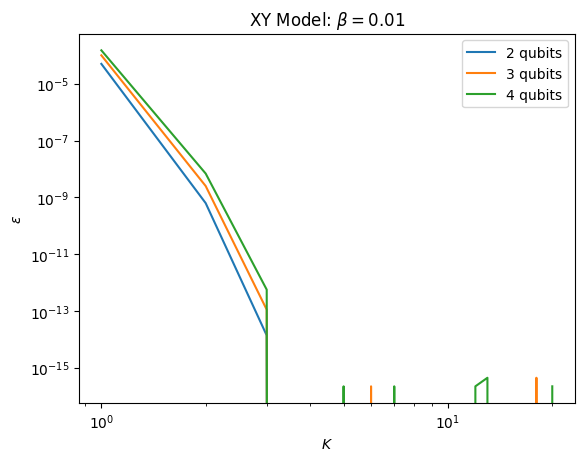

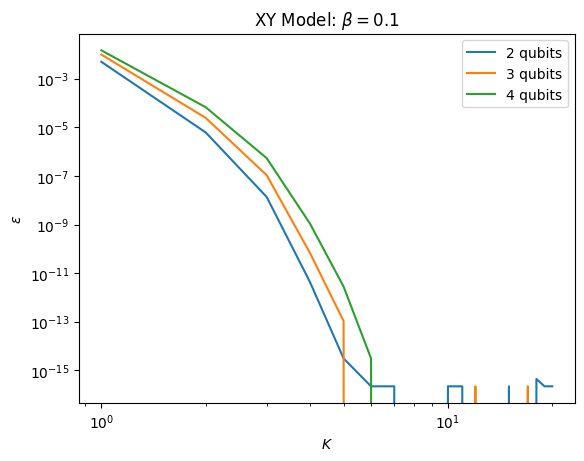

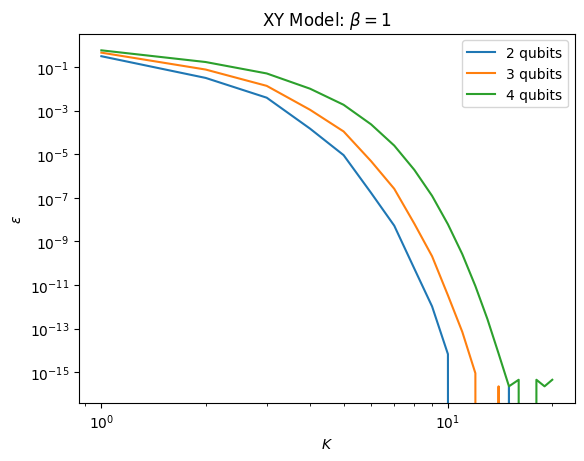

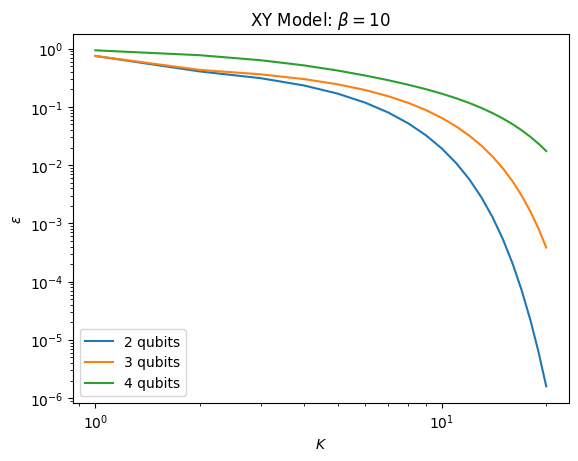

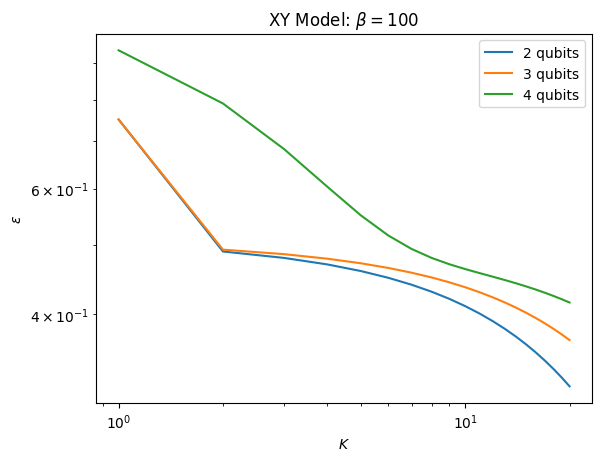

In [25]:
nqubits = [2,3,4]
beta = [0.01 , 0.1 , 1, 10, 100]
for l in range(len(beta)):
    plt.figure()
    plt.title("XY Model: " + r'$\beta = $' + str(beta[l]))
    for j in range(len(nqubits)):
        H_def = sum([ X(x)*X(x+1)+Y(x)*Y(x+1)   for x in range(nqubits[j]-1)])
        H = hamiltonians.SymbolicHamiltonian(H_def).matrix
        H = np.kron(H,np.eye(2**nqubits[j]))
        H = sp.sparse.csr_matrix(H)
        size = 20
        K = np.linspace(1, size, size)
        fidelity = np.empty(size+1)
        initState = tfd0(nqubits[j])
        tfd = TFD(beta[l], H, initState)
        fidelity[0] = Fidelity(tfd, initState)
        for k in range(size):
            initState = tfd0(nqubits[j])
            fidelity[k+1] = thermalStatePrepMatrixPolynomial(H, nqubits[j], beta[l], k)
        plt.plot(K, 1-fidelity[1:], label = f'{nqubits[j]} qubits')
    plt.xscale("log")
    plt.yscale('log')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$\epsilon$')
    plt.legend()

[Qibo 0.2.16|WARNING|2025-04-04 10:06:57]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:06:57]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:06:57]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:07:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:07:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:07:11]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:07:27]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-04 10:07:27]: Calculating 

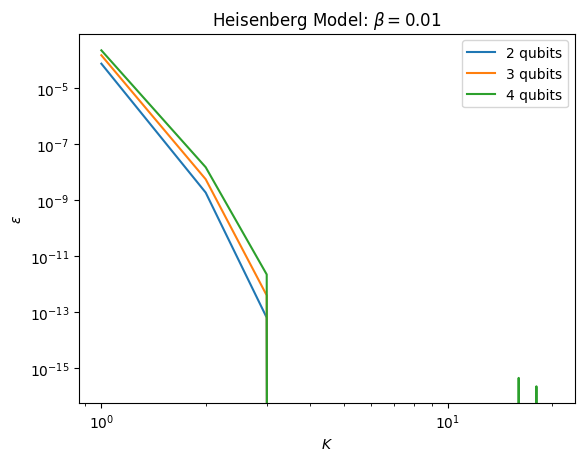

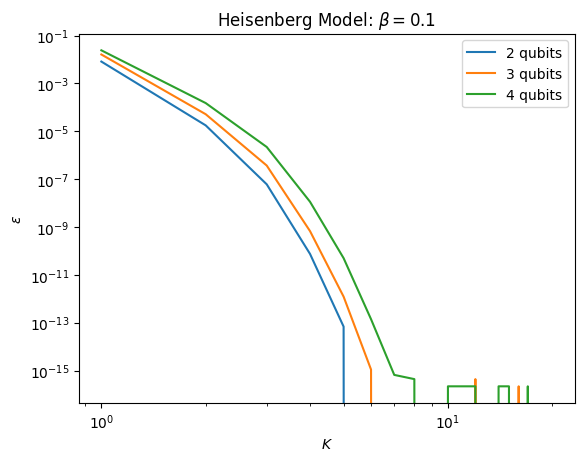

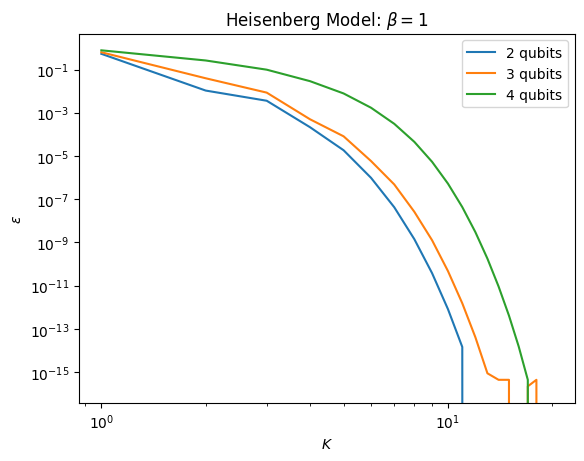

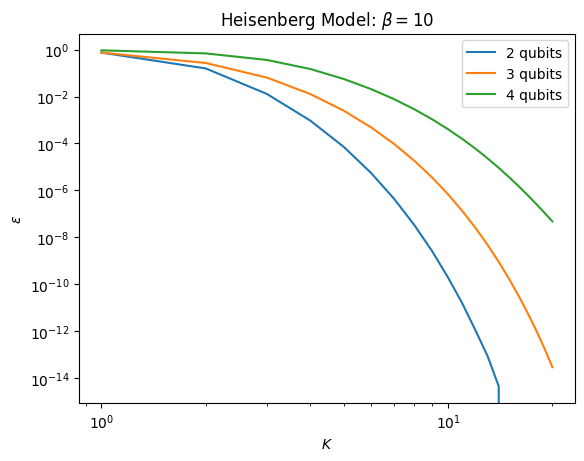

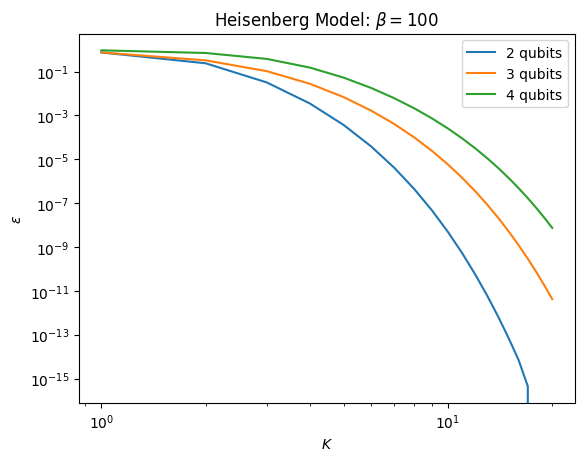

In [26]:
nqubits = [2,3,4]
beta = [0.01 , 0.1 , 1, 10, 100]
for l in range(len(beta)):
    plt.figure()
    plt.title("Heisenberg Model: " + r'$\beta = $' + str(beta[l]))
    for j in range(len(nqubits)):
        H_def = sum([ X(x)*X(x+1)+Y(x)*Y(x+1)+Z(x)*Z(x+1)   for x in range(nqubits[j]-1)])
        H = hamiltonians.SymbolicHamiltonian(H_def).matrix
        H = np.kron(H,np.eye(2**nqubits[j]))
        H = sp.sparse.csr_matrix(H)
        size = 20
        K = np.linspace(1, size, size)
        fidelity = np.empty(size+1)
        initState = tfd0(nqubits[j])
        tfd = TFD(beta[l], H, initState)
        fidelity[0] = Fidelity(tfd, initState)
        for k in range(size):
            initState = tfd0(nqubits[j])
            fidelity[k+1] = thermalStatePrepMatrixPolynomial(H, nqubits[j], beta[l], k)
        plt.plot(K, 1-fidelity[1:], label = f'{nqubits[j]} qubits')
    plt.xscale("log")
    plt.yscale('log')
    plt.xlabel(r'$K$')
    plt.ylabel(r'$\epsilon$')
    plt.legend()